# TP1

Para las imágenes proporcionadas de Tito se pide:
1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las vibraciones de contraste.
2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación

In [1]:
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from os import walk

Función helper para cargar lista de archivos de un subdirectorio.

In [2]:
def collect_image_filenames(img_path):
    img_filenames = []
    for (dirpath, dirnames, filenames) in walk(img_path):
        img_filenames.extend(filenames)
        break
    return list(map(lambda x: img_path+x,img_filenames))

In [22]:
IMAGE_PATH = "./data/"
testrgb_img_filenames = collect_image_filenames(img_path=IMAGE_PATH+"test_rgb/")
testrgb_img_filenames

test_images = []
for i in range(0, len(testrgb_img_filenames)):
    image_filename = testrgb_img_filenames[i]
    print(image_filename)
    img = image.imread(image_filename)
    test_images.append(img)    
    print("Average Color: ", img[:,:,0].mean(),img[:,:,1].mean(),img[:,:,2].mean())
    print("Max Color: ", img[:,:,0].max(),img[:,:,1].max(),img[:,:,2].max())

./data/test_rgb/test_blue.png
Average Color:  0.40398958 0.27246737 0.39490128
Max Color:  0.64705884 0.5411765 0.78431374
./data/test_rgb/test_green.png
Average Color:  0.50731766 0.5139762 0.32766005
Max Color:  0.8235294 0.98039216 0.67058825
./data/test_rgb/test_red.png
Average Color:  0.611153 0.31803086 0.3575324
Max Color:  0.96862745 0.6156863 0.6862745


In [4]:
def plot_corrected_images(img_filenames,fn):
    """Dada una lista de imagenes y un operador de corrección f(x), 
       las grafica como original vs corregida.
    """
    fig=plt.figure(figsize=(16, len(img_filenames)*4))
    columns = 2
    rows = len(img_filenames)
    for i in range(0, len(img_filenames)):
        img = image.imread(img_filenames[i])
        fig.add_subplot(rows, columns, i*columns+1)
        plt.imshow(img,aspect='auto')
        plt.title("Original")
        plt.axis('off')
        fig.add_subplot(rows, columns, i*columns+2)
        plt.imshow(fn(img),aspect='auto')
        plt.title("Corregida") 
        plt.axis('off')    
    plt.show()

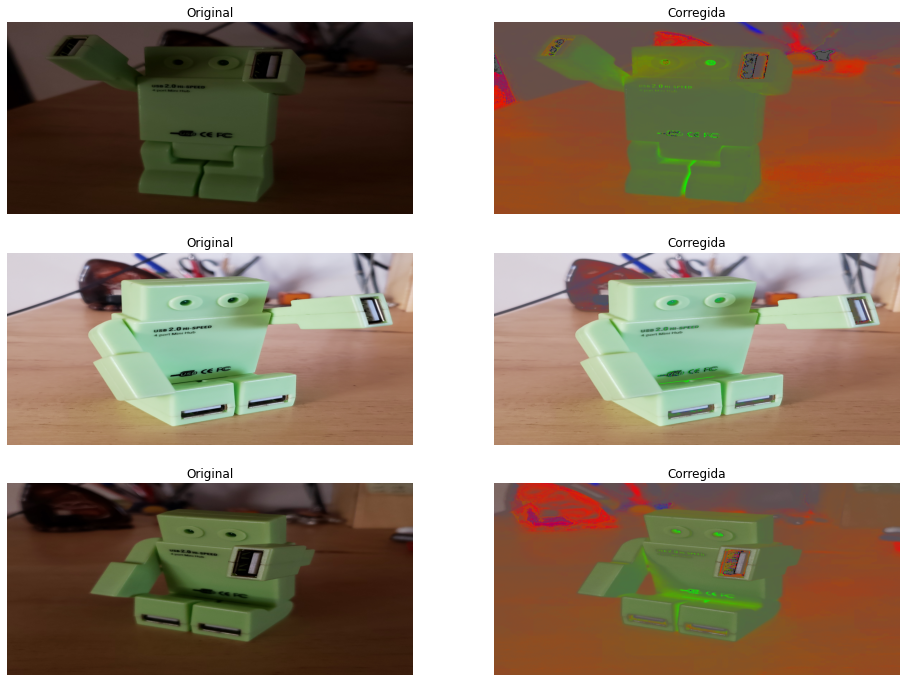

In [5]:
def convert_to_chromaticity_coords(img):    
    """Convierte a coordenadas cromáticas
    """
    corrected_img = img.copy()
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]    
    z = np.clip(r+g+b,0.0,1.0)
    
    # Reemplazar 0 con mediana?
    m = np.median(z[z > 0])
    z[z == 0] = m
    
    corrected_img[:,:,0] = corrected_img[:,:,0]/z
    corrected_img[:,:,1] = corrected_img[:,:,1]/z
    corrected_img[:,:,2] = corrected_img[:,:,2]/z
    return corrected_img

chroma_img_filenames = collect_image_filenames(img_path=IMAGE_PATH+"chroma/")
plot_corrected_images(chroma_img_filenames,convert_to_chromaticity_coords)    

0.78039217 0.4392157 0.19215687
0.12156863 0.4627451 0.6509804
0.8156863 0.18431373 0.6784314


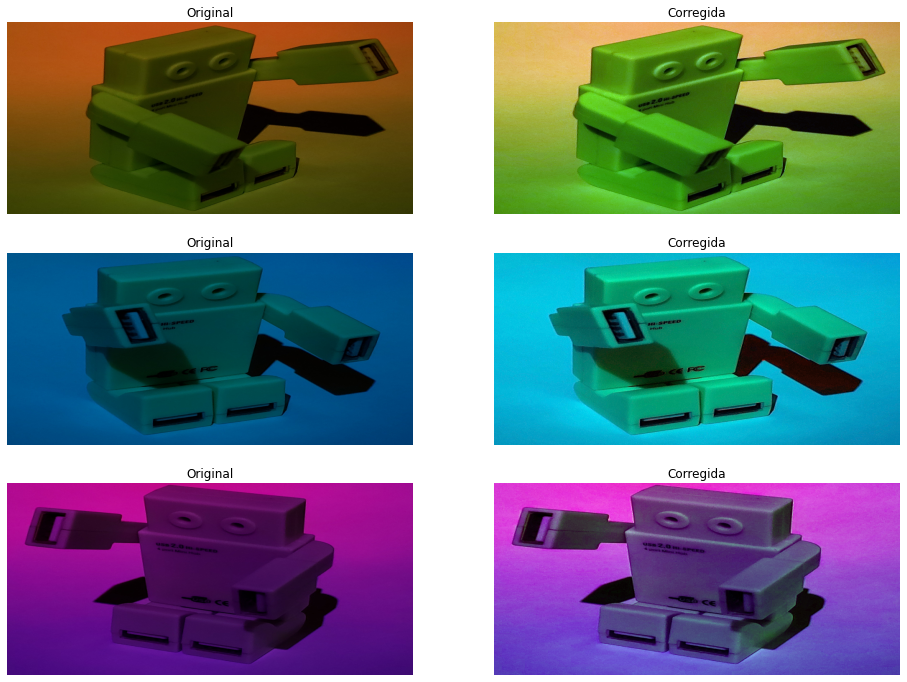

In [6]:
def white_patch(img):
    """Algoritmo White Patch
    """
    r_max=img[:,:,0].max()
    g_max=img[:,:,1].max()
    b_max=img[:,:,2].max()
    print(r_max,g_max,b_max)
    img[:,:,0] = (1.0/r_max) * img[:,:,0]
    img[:,:,1] = (1.0/g_max) * img[:,:,1]
    img[:,:,2] = (1.0/b_max) * img[:,:,2]
    return img

wp_img_filenames = collect_image_filenames(img_path=IMAGE_PATH+"wp/")
plot_corrected_images(wp_img_filenames,white_patch)    